# CrewAI Demo
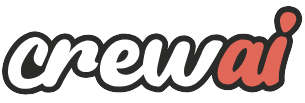
## Setup

In [11]:
from crewai import Agent, Task, Crew
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv()

os.environ["OTEL_SDK_DISABLED"] = "true"

default_llm = ChatOpenAI(model_name="gpt-4", api_key=os.getenv('OPENAI_API_KEY'))

## Agent definitions

In [12]:
# Agent 1: Venue Coordinator
venue_coordinator = Agent(
    role="Venue Coordinator",
    goal="Identify the an appropriate country, city, date and duration based on event requirements",
    #verbose=True,
    llm=default_llm,
    backstory=(
        "With a keen sense of space and understanding of event logistics, "
        "you excel at finding and securing the perfect location (country, city), date and duration "
        "that fits the event's theme, and size constraints."
    )
)

# Agent 2: Editorial Curator
editorial_curator = Agent(
    role='Editorial Curator',
    goal=(
        "Decide the content of the event "
        "including conferences and animations"
    ),
    #verbose=True,
    llm=default_llm,
    backstory=(
        "A curious mind fascinated by cutting-edge innovation, you know everything about tech."
    )
) 

# Agent 3: Marketing and Communications Agent
marketing_communications_agent = Agent(
    role="Marketing and Communications Agent",
    goal="Effectively market the event and communicate with participants",
    #verbose=True,
    llm=default_llm,
    backstory=(
        "Creative and communicative, you craft compelling messages and "
        "engage with potential attendees to maximize event exposure and participation."
    )
)

## Task definitions

In [13]:
# Tasks for conference organization
venue_task = Task(
  description='Determine the best location for an international IT conference based in Africa',
  agent=venue_coordinator,
  expected_output='The country, the city and the best period to organize the event'
)

content_task = Task(
  description='Determine the global theme of the event, its tracks and main speakers',
  agent=editorial_curator,
  expected_output='A global theme for the event and a proposed agenda of conferences'
)

communication_task = Task(
  description='Determine the marketing and communication on the event to make it appealing and engaging',
  agent=marketing_communications_agent,
  expected_output='Marketing and communication plan including the event name, catchphrase and messaging'
)

## Crew definition

In [14]:
# Instantiate the crew
event_crew = Crew(
  agents=[venue_coordinator, editorial_curator, marketing_communications_agent],
  tasks=[venue_task, content_task,communication_task ],
  verbose=True
)

2024-11-03 12:26:07,947 - 139943073456256 - __init__.py-__init__:538 - WARNING: Overriding of current TracerProvider is not allowed


## Execution

In [15]:
# Begin the task execution
event_crew.kickoff()

2024-11-03 12:26:15,074 - 139943073456256 - __init__.py-__init__:1236 - WARNING: SDK is disabled.
2024-11-03 12:26:15,080 - 139943073456256 - __init__.py-__init__:1236 - WARNING: SDK is disabled.


# Agent: Venue Coordinator
## Task: Determine the best location for an international IT conference based in Africa


2024-11-03 12:26:20,227 - 139943073456256 - __init__.py-__init__:1236 - WARNING: SDK is disabled.




# Agent: Venue Coordinator
## Final Answer: 
South Africa, specifically the city of Johannesburg, would be an ideal location. Johannesburg is an economic powerhouse with a thriving tech industry, making it suitable for an international IT conference. As for the best period, considering Johannesburg's climate and the city's event calendar, September would be a good choice. It's the start of spring in South Africa, so the weather is pleasant, and it avoids the peak summer vacation and holiday season. The duration of the event could be five days, from Monday to Friday, mimicking a working week and allowing for a comprehensive conference program.


# Agent: Editorial Curator
## Task: Determine the global theme of the event, its tracks and main speakers


2024-11-03 12:26:29,823 - 139943073456256 - __init__.py-__init__:1236 - WARNING: SDK is disabled.




# Agent: Editorial Curator
## Final Answer: 
Global Theme: "Innovative Tech for a Sustainable Future"

Day 1 - Track: The Intersection of Technology and Sustainability
Main Speaker: Dr. Jane Goodall, renowned ethologist and environmental advocate, discussing the role of technology in global conservation efforts. 

Day 2 - Track: Renewable Energy Technologies
Main Speaker: Elon Musk, CEO of Tesla and SpaceX, discussing advancements in electric vehicles and solar energy.

Day 3 - Track: Smart Cities and Sustainable Urban Development
Main Speaker: Patricia de Lille, Mayor of Cape Town, discussing how technology can drive sustainable urban development.

Day 4 - Track: Green IT and Sustainable Computing
Main Speaker: Lisa Su, CEO of Advanced Micro Devices, discussing the role of the tech industry in promoting sustainability.

Day 5 - Track: Tech Innovations in Agriculture
Main Speaker: Strive Masiyiwa, founder of Econet Wireless, discussing the role of technology in promoting sustainable 

CrewOutput(raw='Event Name: "TechFuture Summit: Powering Sustainability Through Innovation"\n\nCatchphrase: "Join us for a transformative journey into the future where technology and sustainability intersect"\n\nMarketing and Communication Plan:\n\n1. Messaging:\n   - "TechFuture Summit is not just a conference, but a global platform where innovation meets sustainability. Hear from industry leaders like Dr. Jane Goodall, Elon Musk, Patricia de Lille, Lisa Su, and Strive Masiyiwa as they delve into how technology is driving sustainability across various sectors."\n   - "From green IT to renewable energy technologies, smart cities, and tech innovations in agriculture, TechFuture Summit covers it all. Join us for these five days of insightful discussions, meaningful networking and transformative learning experiences."\n\n2. Channels:\n   - Social Media: Promote the event and its speakers on various platforms like LinkedIn, Twitter, Facebook, and Instagram. Use engaging visuals and videos 